In [1]:

# Change the current working directory to the specified path
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import LogNorm

In [2]:
# Define the path as a variable for better readability and maintainability
# data_path = '/home/felipe/autolst/m3_L24_D12-start'
# mat_file = '/home/felipe/autolst/m3_L24_D12-start/probs_m3-l24d12-start.mat'

data_path = '/home/felipe/autolst/m3_L24_D12'
mat_file = '/home/felipe/autolst/m3_L24_D12-2D/probs_m3-l24d12.mat'

os.chdir(data_path)

# Print the current working directory to confirm the change
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/felipe/autolst/m3_L24_D12


In [3]:
def loadlog(name=None):
    print("load logs")
    
    # Check if the file name was provided
    if name is None:
        filename = 'log.txt'
    else:
        filename = name
    
    # Load the data from the file, skipping the header (assuming the header occupies 1 line)
    rawdata = np.loadtxt(filename, skiprows=1)
    
    # Separate the columns as specified in the MATLAB code
    log = {
        'saveNumber': rawdata[:, 0],
        'iter': rawdata[:, 1],
        't': rawdata[:, 2],
        'dt': rawdata[:, 3],
        'cfl': rawdata[:, 4],
        'res': rawdata[:, 5:10],  # Columns 6 to 10
        'U': rawdata[:, 10::5],   # Every 5 columns, starting from column 11
        'V': rawdata[:, 11::5],   # Every 5 columns, starting from column 12
        'W': rawdata[:, 12::5],   # Every 5 columns, starting from column 13
        'R': rawdata[:, 13::5],   # Every 5 columns, starting from column 14
        'E': rawdata[:, 14::5]    # Every 5 columns, starting from column 15
    }
    
    return log


log = loadlog()

load logs


In [4]:
# Load the .mat file
data = scipy.io.loadmat(mat_file)
# Extract the 'probes' matrix
probes = data['probes']  # Array [7778x3]
# Separate the columns into X, Y, Z
X = probes[:, 0]  # First column: X coordinates
Y = probes[:, 1]  # Second column: Y coordinates
Z = probes[:, 2]  # Third column: Z coordinates
# Check the dimensions of the coordinates
print(f"Dimensions of X: {X.shape}")
print(f"Dimensions of Y: {Y.shape}")
print(f"Dimensions of Z: {Z.shape}")

Dimensions of X: (7778,)
Dimensions of Y: (7778,)
Dimensions of Z: (7778,)


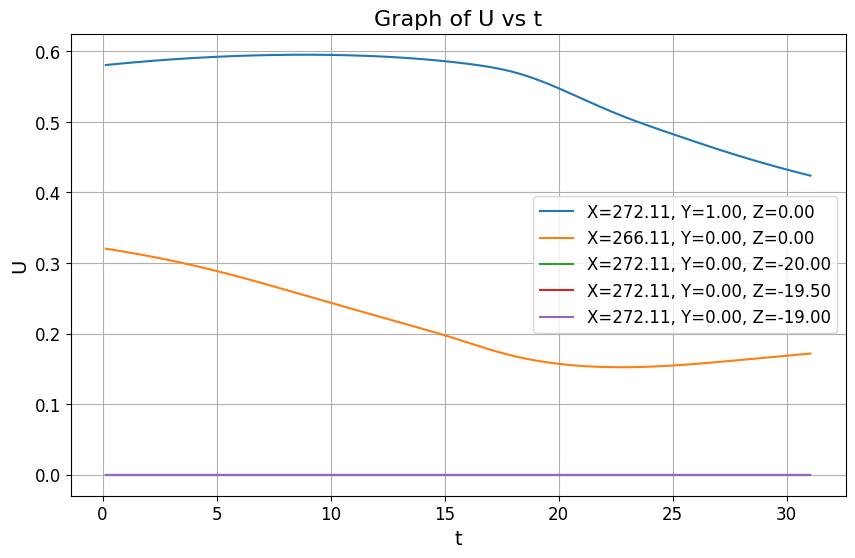

In [5]:
# Assume that U has already been loaded into the `log` dictionary (as in the previous example)
U = log['U']  # Matrix [6951x7778]
# Create the plot for the first 5 columns of U
plt.figure(figsize=(10, 6))
for i in range(5):  # Iterate over the first 5 columns
    label = f"X={X[i]:.2f}, Y={Y[i]:.2f}, Z={Z[i]:.2f}"
    plt.plot(log['t'], U[:, i], label=label)
# Graph settings
plt.title('Graph of U vs t', fontsize=16)
plt.xlabel('t', fontsize=14)
plt.ylabel('U', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tick_params(axis='both', labelsize=12)
plt.show()

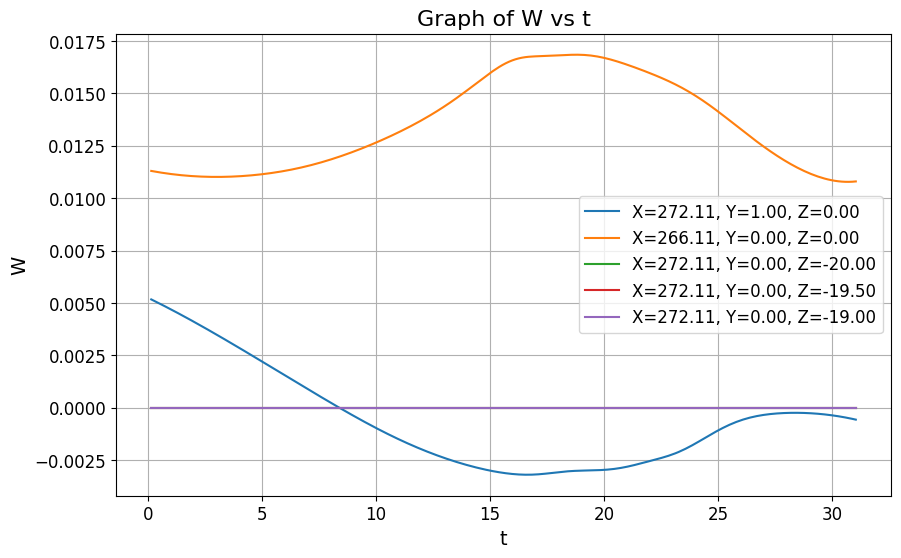

In [6]:
# Assume that W has already been loaded into the `log` dictionary
W = log['W']  # Matrix [6951x7778]
# Create the plot for the first 5 columns of W
plt.figure(figsize=(10, 6))
for i in range(5):  # Iterate over the first 5 columns
    label = f"X={X[i]:.2f}, Y={Y[i]:.2f}, Z={Z[i]:.2f}"
    plt.plot(log['t'], W[:, i], label=label)
# Graph settings
plt.title('Graph of W vs t', fontsize=16)
plt.xlabel('t', fontsize=14)
plt.ylabel('W', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tick_params(axis='both', labelsize=12)
plt.show()

In [7]:
# Assume that X, Y, Z have already been loaded as numpy arrays
# Example: X, Y, Z are one-dimensional arrays with 7778 elements
# Dictionary to store sets of equal X, Y values
sets = {}
# Iterate over all indices
for i in range(len(X)):
    # Create a unique key for X and Y
    key = (X[i], Y[i])  # Tuple (X, Y) as the key
    
    # Check if the key already exists in the dictionary
    if key not in sets:
        # Initialize the set for this key
        sets[key] = {
            'X': X[i],
            'Y': Y[i],
            'Z': [],       # List to store Z values
            'indices': []  # List to store indices
        }
    
    # Add the Z value and index to the corresponding set
    sets[key]['Z'].append(Z[i])
    sets[key]['indices'].append(i)

# Discard the first two sets
# Convert the dictionary into a sorted list of items
# sorted_sets = list(sets.items())
# # Remove the first two sets
# filtered_sets = dict(sorted_sets[2:])
# sets = filtered_sets

# Display the found sets after filtering
#for key, values in filtered_sets.items():
#    print(f"Set for X={key[0]:.2f}, Y={key[1]:.2f}:")
#    print(f"  Z: {values['Z']}")
#    print(f"  Indices: {values['indices']}")
#    print()

In [8]:
# Assume that log['t'], log['U'], X, Y, Z have already been loaded
# Define the values for ti and tf
ti = 1000.0  # Start value of the interval
tf = 2000.0  # End value of the interval
# Function to find the index closest to a value in an array
def find_nearest(array, value):
    return np.abs(array - value).argmin()
# Find the start and end indices in the log['t'] array
idx_ti = find_nearest(log['t'], ti)
idx_tf = find_nearest(log['t'], tf)
# Temporary dictionary to store the sizes of Z_vals_filtrados
temp_sizes = []
# Initial iteration to calculate the sizes of Z_vals_filtrados
for key, values in sets.items():
    Z_vals = values['Z']
    
    # Filter the indices to remove repeated Z values, keeping only the last occurrence
    _, unique_indices = np.unique(Z_vals[::-1], return_index=True)  # Reverse Z_vals to capture the last occurrence
    unique_indices = len(Z_vals) - 1 - unique_indices[::-1]  # Reverse the indices back to the original order
    Z_vals_filtrados = np.array(Z_vals)[unique_indices]
    
    # Store the size of Z_vals_filtrados
    temp_sizes.append(len(Z_vals_filtrados))
# Calculate the mode (most common size) of Z_vals_filtrados
size_counter = Counter(temp_sizes)
most_common_size = size_counter.most_common(1)[0][0]
print(f"Most common size of Z_vals_filtrados: {most_common_size}")
# Dictionary to store the resulting matrices
resulting_matrices = {}
# Extract the t values corresponding to the interval [ti, tf]
t_interval = log['t'][idx_ti:idx_tf + 1]
# Iterate again over the sets where X and Y are equal
for key, values in sets.items():
    # Get the indices corresponding to this combination of X and Y
    column_indices = values['indices']
    Z_vals = values['Z']
    
    # Filter the indices to remove repeated Z values, keeping only the last occurrence
    _, unique_indices = np.unique(Z_vals[::-1], return_index=True)  # Reverse Z_vals to capture the last occurrence
    unique_indices = len(Z_vals) - 1 - unique_indices[::-1]  # Reverse the indices back to the original order
    filtered_column_indices = np.array(column_indices)[unique_indices]
    Z_vals_filtrados = np.array(Z_vals)[unique_indices]
    
    # Check if the size of Z_vals_filtrados is smaller than the most common size
    if len(Z_vals_filtrados) < most_common_size:
        print(f"Block removed for X={values['X']:.2f}, Y={values['Y']:.2f} (Size={len(Z_vals_filtrados)})")
        continue  # Skip this block if it is smaller than the most common size
    
    # Extract the U and W blocks for these columns and the interval [ti, tf]
    block_U = log['U'][idx_ti:idx_tf + 1, filtered_column_indices]
    block_W = log['W'][idx_ti:idx_tf + 1, filtered_column_indices]
    
    # Remove the mean along rows and columns
    row_mean_U = np.mean(block_U, axis=0)  # Mean along rows (for each column)
    global_mean_U = np.mean(row_mean_U)  # Global mean
    block_U = block_U - row_mean_U  # Remove the row mean
    block_U = block_U - global_mean_U  # Remove the global mean
    
    row_mean_W = np.mean(block_W, axis=0)  # Mean along rows (for each column)
    global_mean_W = np.mean(row_mean_W)  # Global mean
    block_W = block_W - row_mean_W  # Remove the row mean
    block_W = block_W - global_mean_W  # Remove the global mean
    
    # Store the block in the dictionary, including the t values
    resulting_matrices[key] = {
        'X': values['X'],
        'Y': values['Y'],
        'Z': Z_vals_filtrados,
        'block_U': block_U,
        'block_W': block_W,
        't': t_interval  # Add the t values to the dictionary
    }

Most common size of Z_vals_filtrados: 81
Block removed for X=266.11, Y=0.00 (Size=1)


In [9]:
# Assume that log['t'], log['U'], X, Y, Z have already been loaded
# And that resulting_matrices was created in the previous block
# Dictionary to store the FFT2 results
fft_results = {}
# Iterate over the resulting matrices
for key, matrix in resulting_matrices.items():
    # Extract information
    X_val = matrix['X']
    Y_val = matrix['Y']
    Z_vals = matrix['Z']
    block_U = matrix['block_U']
    block_W = matrix['block_W']  # Include block_W
    t_interval = matrix['t']  # Load the specific t vector for this block
    
    # Calculate the time interval (dt) based on the t_interval vector
    dt = np.mean(np.diff(t_interval))  # Average interval between time samples
    dz = np.mean(np.diff(Z_vals))      # Average spatial interval between Z samples
    
    # Use the full block_U (without reducing time)
    full_block_U = block_U  # We do not reduce the time
    full_block_W = block_W  # Use the full block_W
    
    # Compute the FFT2 for block_U
    fft2_U = np.fft.fft2(full_block_U)
    fft2_U_shifted = np.fft.fftshift(fft2_U)  # Center the spectrum
    fft2_U_normalized = np.abs(fft2_U_shifted) / np.max(np.abs(fft2_U_shifted))  # Normalize to [0, 1]
    
    # Compute the FFT2 for block_W
    fft2_W = np.fft.fft2(full_block_W)
    fft2_W_shifted = np.fft.fftshift(fft2_W)  # Center the spectrum
    fft2_W_normalized = np.abs(fft2_W_shifted) / np.max(np.abs(fft2_W_shifted))  # Normalize to [0, 1]
    
    # Temporal frequencies (ω)
    temporal_freq = np.fft.fftfreq(full_block_U.shape[0], d=dt)
    temporal_freq_shifted = np.fft.fftshift(temporal_freq)
    
    # Spatial frequencies (β)
    spatial_freq = np.fft.fftfreq(len(Z_vals), d=dz)
    spatial_freq_shifted = np.fft.fftshift(spatial_freq)
    
    # Create grids for plotting
    temporal_freq_grid, spatial_freq_grid = np.meshgrid(temporal_freq_shifted, spatial_freq_shifted, indexing='ij')
    
    # Store the results in the dictionary
    fft_results[key] = {
        'X': X_val,
        'Y': Y_val,
        'Z': Z_vals,
        'full_block_U': full_block_U,  # Store the full block_U
        'full_block_W': full_block_W,  # Store the full block_W
        'fft2_U_shifted': fft2_U_shifted,      # FFT2 of U (not normalized)
        'fft2_U_normalized': fft2_U_normalized,  # FFT2 of U normalized
        'fft2_W_shifted': fft2_W_shifted,      # FFT2 of W (not normalized)
        'fft2_W_normalized': fft2_W_normalized,  # FFT2 of W normalized
        'temporal_freq_shifted': temporal_freq_shifted,
        'spatial_freq_shifted': spatial_freq_shifted,
        'temporal_freq_grid': temporal_freq_grid,
        'spatial_freq_grid': spatial_freq_grid
    }

/home/felipe/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/felipe/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3115450/480407969.py:26: RuntimeWarning: invalid value encountered in divide
  fft2_U_normalized = np.abs(fft2_U_shifted) / np.max(np.abs(fft2_U_shifted))  # Normalize to [0, 1]
/tmp/ipykernel_3115450/480407969.py:31: RuntimeWarning: invalid value encountered in divide
  fft2_W_normalized = np.abs(fft2_W_shifted) / np.max(np.abs(fft2_W_shifted))  # Normalize to [0, 1]


In [10]:
# Organize cases by X values
cases_by_X = {}
for key, result in fft_results.items():
    X_val = result['X']
    Y_val = result['Y']
    if X_val not in cases_by_X:
        cases_by_X[X_val] = []
    cases_by_X[X_val].append(Y_val)

# Show available X values
print("Available X values:")
X_available = sorted(cases_by_X.keys())
for i, X_val in enumerate(X_available):
    print(f"{i + 1}: X={X_val:.2f}")

# Request user input to select an X value
try:
    # List X values again before input
    print("\nPlease choose an X value from the list above.")
    choice_X = int(input("Enter the number corresponding to the desired X value: ")) - 1
    if choice_X < 0 or choice_X >= len(X_available):
        raise ValueError("Invalid X choice.")

    # Select the chosen X value
    X_chosen = X_available[choice_X]
    # Show Y values corresponding to the chosen X
    Y_available = sorted(cases_by_X[X_chosen])
    print(f"\nAvailable Y values for X={X_chosen:.2f}:")
    for i, Y_val in enumerate(Y_available):
        print(f"{i + 1}: Y={Y_val:.2f}")
    
    # List Y values again before input
    print("\nPlease choose a Y value from the list above.")
    choice_Y = int(input("Enter the number corresponding to the desired Y value: ")) - 1
    if choice_Y < 0 or choice_Y >= len(Y_available):
        raise ValueError("Invalid Y choice.")

    # Select the chosen Y value
    Y_chosen = Y_available[choice_Y]
    # Find the case corresponding to the chosen X and Y values
    chosen_key = None
    for key, result in fft_results.items():
        if np.isclose(result['X'], X_chosen) and np.isclose(result['Y'], Y_chosen):
            chosen_key = key
            break
    if chosen_key is None:
        raise ValueError("Case not found for the chosen X and Y values.")

    # Extract information from the chosen case
    result = fft_results[chosen_key]
    Z_vals = result['Z']
    full_block_U = result['full_block_U']  # Use the full U block
    full_block_W = result['full_block_W']  # Use the full W block
    freq_temporal_shifted = result['temporal_freq_shifted']  # Correct key name
    freq_spatial_shifted = result['spatial_freq_shifted']    # Correct key name
    freq_temporal_grid = result['temporal_freq_grid']        # Correct key name
    freq_spatial_grid = result['spatial_freq_grid']          # Correct key name

    # Get the specific t_interval vector for this block
    t_interval = resulting_matrices[chosen_key]['t']  # Use the full t vector

    # Request user input to choose between U and W
    print("\nChoose between U and W:")
    print("1: U")
    print("2: W")
    variable_choice = int(input("Enter the number corresponding to the desired variable: "))
    if variable_choice not in [1, 2]:
        raise ValueError("Invalid variable choice.")

    # Select the normalized FFT and the corresponding block
    if variable_choice == 1:
        fftplot = result['fft2_U_normalized']
        selected_variable = "U"
    else:
        fftplot = result['fft2_W_normalized']
        selected_variable = "W"

    # Plot the physical space
    plt.figure(figsize=(12, 6))

    # Calculate edges for t_interval and Z_vals
    t_edges = np.linspace(t_interval[0], t_interval[-1], len(t_interval) + 1)
    z_edges = np.linspace(Z_vals[0], Z_vals[-1], len(Z_vals) + 1)

    plt.subplot(1, 2, 1)
    plt.pcolormesh(t_edges, z_edges, full_block_U.T, shading='auto', cmap='viridis')
    plt.colorbar(label='Amplitude')
    plt.title(f'Physical Space\nX={X_chosen:.2f}, Y={Y_chosen:.2f}')
    plt.xlabel('Time (t)')
    plt.ylabel('Position (Z)')

    # Filter only positive temporal frequencies
    freq_temporal_positive = freq_temporal_shifted[freq_temporal_shifted >= 0]
    idx_positive = np.where(freq_temporal_shifted >= 0)[0]
    fftplot_filtered = fftplot[idx_positive, :]

    # Invert axes: β on the x-axis, ω on the y-axis
    freq_spatial_edges = np.linspace(freq_spatial_shifted[0], freq_spatial_shifted[-1], len(freq_spatial_shifted) + 1)
    freq_temporal_edges = np.linspace(freq_temporal_positive[0], freq_temporal_positive[-1], len(freq_temporal_positive) + 1)

    # Limit β and ω values
    beta_min, beta_max = -0.5, 0.5
    omega_max = 0.3

    # Find indices corresponding to β and ω limits
    idx_beta_min = np.searchsorted(freq_spatial_shifted, beta_min)
    idx_beta_max = np.searchsorted(freq_spatial_shifted, beta_max)
    idx_omega_max = np.searchsorted(freq_temporal_positive, omega_max)

    # Crop data within the limits
    fftplot_cropped = fftplot_filtered[:idx_omega_max, idx_beta_min:idx_beta_max]
    freq_spatial_cropped = freq_spatial_shifted[idx_beta_min:idx_beta_max]
    freq_temporal_cropped = freq_temporal_positive[:idx_omega_max]

    # Create cropped grids for plotting
    freq_spatial_edges_cropped = np.linspace(freq_spatial_cropped[0], freq_spatial_cropped[-1], len(freq_spatial_cropped) + 1)
    freq_temporal_edges_cropped = np.linspace(freq_temporal_cropped[0], freq_temporal_cropped[-1], len(freq_temporal_cropped) + 1)

    # Plot the amplitude space (FFT2) with logarithmic scale and color limits
    plt.subplot(1, 2, 2)
    plt.pcolormesh(
        freq_spatial_edges_cropped,
        freq_temporal_edges_cropped,
        fftplot_cropped,
        shading='auto',
        cmap='inferno',
        norm=LogNorm(vmin=1e-4, vmax=1e-1)  # Limit the color scale between 10^-4 and 1
    )
    plt.colorbar(label='Normalized Amplitude (log scale)')
    plt.title(f'Amplitude Space ({selected_variable})\nX={X_chosen:.2f}, Y={Y_chosen:.2f}')
    plt.xlabel('Spatial Frequency (β)')
    plt.ylabel('Temporal Frequency (ω)')

    # Limit the axes
    plt.xlim(beta_min, beta_max)
    plt.ylim(0, omega_max)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error: {e}. Please enter a valid value.")

Available X values:
1: X=272.11
2: X=320.11
3: X=368.11
4: X=416.11
5: X=464.11
6: X=512.11
7: X=560.11
8: X=608.11
9: X=656.11
10: X=704.11
11: X=752.11
12: X=800.00

Please choose an X value from the list above.



Available Y values for X=272.11:
1: Y=0.00
2: Y=0.10
3: Y=0.20
4: Y=0.50
5: Y=0.75
6: Y=1.00
7: Y=2.00
8: Y=4.00

Please choose a Y value from the list above.

Choose between U and W:
1: U
2: W
Error: invalid literal for int() with base 10: 'U'. Please enter a valid value.
